In [2]:
import pandas as pd

In [3]:
gold_standard=pd.read_csv("D:/personal/columbia university/capstone/policy-toolkit-master/policy-toolkit-master/data/processed/gold_standard.csv")

In [4]:
gold_standard.shape

(1033, 3)

In [5]:
gold_standard.head()

,label,sentences,class
0,0,the purpose of the middle level institutions i...,1.0
1,1,"to address these challenges, the government wi...",1.0
2,2,lack of a database and information to support ...,3.0
3,3,to contribute to efforts to reduce poverty and...,3.0
4,4,secretariat. its terms of reference will inclu...,1.0


In [7]:
gold_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 3 columns):
label        1033 non-null int64
sentences    1033 non-null object
class        1033 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 24.3+ KB


In [8]:
gold_standard.groupby(['class']).size()
# ABSTAIN = 0
# NEUTRAL = 1
# NEGATIVE = 2
# POSITIVE = 3

class
1.0    646
2.0     52
3.0    335
dtype: int64

In [110]:
neutral=gold_standard[gold_standard["class"]==1]
NEGATIVE=gold_standard[gold_standard["class"]==2]
POSITIVE=gold_standard[gold_standard["class"]==3]

neutral=neutral.reset_index(drop=True)
NEGATIVE=NEGATIVE.reset_index(drop=True)
POSITIVE=POSITIVE.reset_index(drop=True)

In [111]:
neutral_sample0=neutral.get_value(0,"sentences")
NEGATIVE_sample0=NEGATIVE.get_value(0,"sentences")
POSITIVE_sample0=POSITIVE.get_value(0,"sentences")

neutral_sample1=neutral.get_value(1,"sentences")
NEGATIVE_sample1=NEGATIVE.get_value(1,"sentences")
POSITIVE_sample1=POSITIVE.get_value(1,"sentences")

neutral_sample2=neutral.get_value(2,"sentences")
NEGATIVE_sample2=NEGATIVE.get_value(2,"sentences")
POSITIVE_sample2=POSITIVE.get_value(2,"sentences")

C:\Programs\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
C:\Programs\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Programs\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Programs\anaconda\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Programs\anaconda\anaconda3\lib\site-packages\ipykernel_laun

In [112]:
print(neutral_sample0)
print()
print(NEGATIVE_sample0)
print()
print(POSITIVE_sample0)

the purpose of the middle level institutions is to provide a link between national and local level implementation of asds, technical support and coordination between ministries and stakeholders. in this connection, the following institutions will be strengthened  the inter ministerial coordination committee icc will be expanded to include all ministries that provide services to the agricultural sector. the icc will be composed of permanent secretaries of the collaborating ministries, and will be responsible for coordinating the planning of the strategy at the agricultural sector level and monitoring its implementation to ensure that its goals are achieved.

access to bank credit by farmers is still a major challenge despite the fact that kenya has a relatively well developed banking system. risks associated with agribusiness coupled with complicated land laws and tenure systems that limit the use of land as collateral make financing agriculture unattractive to the formal banking indust

In [222]:
# set some custom colors that will apply globally to each plot.
sns.set(style="ticks",
    rc={
        "figure.figsize": [5, 4],
        "text.color": "white",
        "axes.labelcolor": "white",
        "axes.edgecolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "axes.facecolor": "#5C0E10",
        "figure.facecolor": "#5C0E10"}
    )

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt
import en_core_web_sm
nlp = en_core_web_sm.load()

class Nlp_sample_pipeline:
    def __init__(self, sentence, titles = None):
        self.corpus = sentence
        nlp.max_length = len(self.corpus)
        self.doc = nlp(self.corpus)
    
    def text_token(self):
        self.token_list=[]
        columns=["text","text_lower", "lemma", "lemma_lower","part_of_speech", "is_alphabet", "is_stopword"]
        for token in self.doc:
            self.token_list.append([token.text, token.lower_, token.lemma_, token.lemma_.lower(), token.pos_, token.is_alpha, token.is_stop])
        self.token_list=pd.DataFrame(self.token_list,columns=columns)
        return self.token_list
    
    def text_entities(self):
        self.entity_list = []
        columns=["text","text_lower", "label"]
        for ent in self.doc.ents:
            self.entity_list.append([ent.text, ent.lower_, ent.label_])
        self.entity_list=pd.DataFrame(self.entity_list,columns=columns)
        return self.entity_list
    
    def frequentwords(self):
        words = self.token_list[(self.token_list["is_alphabet"] == True) & (self.token_list["is_stopword"] == False) 
                       & (self.token_list["lemma_lower"].str.len() > 1)]["lemma_lower"].value_counts()[:5]
        sns.barplot(x=words.values, y=words.index, palette="Blues_d", linewidth=0)
        plt.xlabel("Ocurrences Count")
        plt.title("Most Frequent Words")
        plt.show()


         text text_lower    lemma lemma_lower part_of_speech  is_alphabet  \
0         the        the      the         the            DET         True   
1     purpose    purpose  purpose     purpose           NOUN         True   
2          of         of       of          of            ADP         True   
3         the        the      the         the            DET         True   
4      middle     middle   middle      middle            ADJ         True   
..        ...        ...      ...         ...            ...          ...   
98        its        its   -PRON-      -pron-            DET         True   
99      goals      goals     goal        goal           NOUN         True   
100       are        are       be          be           VERB         True   
101  achieved   achieved  achieve     achieve           VERB         True   
102         .          .        .           .          PUNCT        False   

     is_stopword  
0           True  
1          False  
2           True  

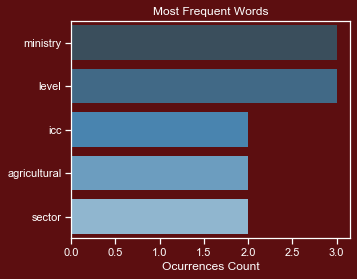

In [224]:
pip=Nlp_sample_pipeline(neutral_sample0)
print(pip.text_token())
print(pip.text_entities())
pip.frequentwords()

       text text_lower   lemma lemma_lower part_of_speech  is_alphabet  \
0    access     access  access      access           NOUN         True   
1        to         to      to          to            ADP         True   
2      bank       bank    bank        bank           NOUN         True   
3    credit     credit  credit      credit           NOUN         True   
4        by         by      by          by            ADP         True   
..      ...        ...     ...         ...            ...          ...   
163      to         to      to          to           PART         True   
164  access     access  access      access           VERB         True   
165    bank       bank    bank        bank           NOUN         True   
166  credit     credit  credit      credit           NOUN         True   
167       .          .       .           .          PUNCT        False   

     is_stopword  
0          False  
1           True  
2          False  
3          False  
4           True

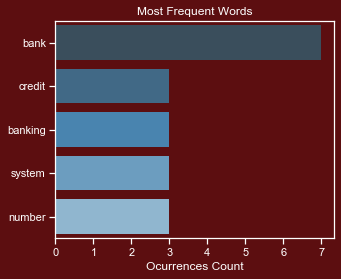

In [225]:
pip=Nlp_sample_pipeline(NEGATIVE_sample0)
print(pip.text_token())
print(pip.text_entities())
pip.frequentwords()

             text     text_lower          lemma    lemma_lower part_of_speech  \
0            lack           lack           lack           lack           NOUN   
1              of             of             of             of            ADP   
2               a              a              a              a            DET   
3        database       database       database       database           NOUN   
4             and            and            and            and          CCONJ   
5     information    information    information    information           NOUN   
6              to             to             to             to           PART   
7         support        support        support        support           VERB   
8        regional       regional       regional       regional            ADJ   
9     development    development    development    development           NOUN   
10             is             is             be             be           VERB   
11        another        ano

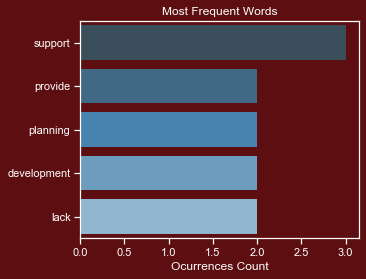

In [226]:
pip=Nlp_sample_pipeline(POSITIVE_sample0)
print(pip.text_token())
print(pip.text_entities())
pip.frequentwords()

            text   text_lower        lemma  lemma_lower part_of_speech  \
0             to           to           to           to           PART   
1        address      address      address      address           VERB   
2          these        these        these        these            DET   
3     challenges   challenges    challenge    challenge           NOUN   
4              ,            ,            ,            ,          PUNCT   
..           ...          ...          ...          ...            ...   
96         basin        basin        basin        basin           NOUN   
97         based        based         base         base           VERB   
98   development  development  development  development           NOUN   
99    programmes   programmes    programme    programme           NOUN   
100            .            .            .            .          PUNCT   

     is_alphabet  is_stopword  
0           True         True  
1           True        False  
2           Tru

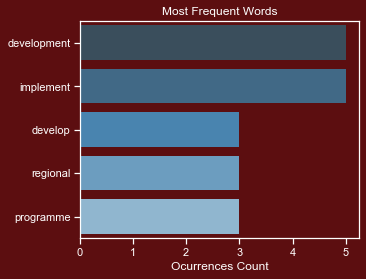

In [227]:
pip=Nlp_sample_pipeline(neutral_sample1)
print(pip.text_token())
print(pip.text_entities())
pip.frequentwords()

            text    text_lower         lemma   lemma_lower part_of_speech  \
0          after         after         after         after            ADP   
1   independence  independence  independence  independence           NOUN   
2              ,             ,             ,             ,          PUNCT   
3            the           the           the           the            DET   
4     government    government    government    government           NOUN   
..           ...           ...           ...           ...            ...   
87     community     community     community     community           NOUN   
88         based         based          base          base           VERB   
89       lending       lending       lending       lending           NOUN   
90  institutions  institutions   institution   institution           NOUN   
91             .             .             .             .          PUNCT   

    is_alphabet  is_stopword  
0          True         True  
1          Tr

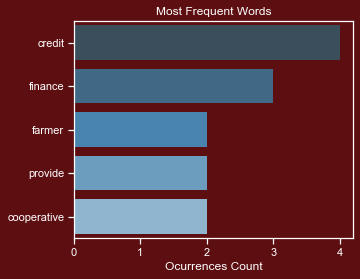

In [228]:
pip=Nlp_sample_pipeline(NEGATIVE_sample1)
print(pip.text_token())
print(pip.text_entities())
pip.frequentwords()

             text     text_lower          lemma    lemma_lower part_of_speech  \
0              to             to             to             to           PART   
1      contribute     contribute     contribute     contribute           VERB   
2              to             to             to             to            ADP   
3         efforts        efforts         effort         effort           NOUN   
4              to             to             to             to           PART   
5          reduce         reduce         reduce         reduce           VERB   
6         poverty        poverty        poverty        poverty           NOUN   
7             and            and            and            and          CCONJ   
8        increase       increase       increase       increase           VERB   
9          income         income         income         income           NOUN   
10              ,              ,              ,              ,          PUNCT   
11            the           

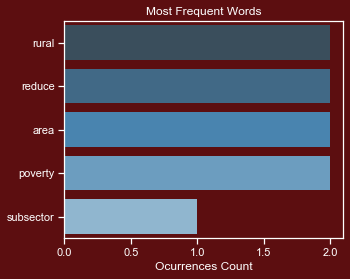

In [229]:
pip=Nlp_sample_pipeline(POSITIVE_sample1)
print(pip.text_token())
print(pip.text_entities())
pip.frequentwords()

             text     text_lower         lemma   lemma_lower part_of_speech  \
0     secretariat    secretariat   secretariat   secretariat           NOUN   
1               .              .             .             .          PUNCT   
2             its            its        -PRON-        -pron-            DET   
3           terms          terms          term          term           NOUN   
4              of             of            of            of            ADP   
5       reference      reference     reference     reference           NOUN   
6            will           will          will          will           VERB   
7         include        include       include       include           VERB   
8       preparing      preparing       prepare       prepare           VERB   
9       technical      technical     technical     technical            ADJ   
10     guidelines     guidelines     guideline     guideline           NOUN   
11            for            for           for      

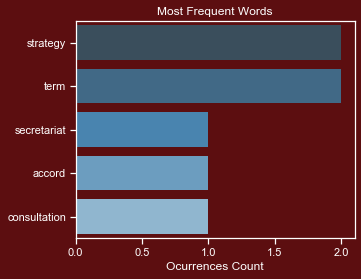

In [230]:
pip=Nlp_sample_pipeline(neutral_sample2)
print(pip.text_token())
print(pip.text_entities())
pip.frequentwords()

             text    text_lower         lemma   lemma_lower part_of_speech  \
0      inadequate    inadequate    inadequate    inadequate            ADJ   
1       budgetary     budgetary     budgetary     budgetary            ADJ   
2      allocation    allocation    allocation    allocation           NOUN   
3               .             .             .             .          PUNCT   
4    insufficient  insufficient  insufficient  insufficient            ADJ   
..            ...           ...           ...           ...            ...   
147            to            to            to            to           PART   
148     constrain     constrain     constrain     constrain           VERB   
149           the           the           the           the            DET   
150        sector        sector        sector        sector           NOUN   
151             .             .             .             .          PUNCT   

     is_alphabet  is_stopword  
0           True        False  

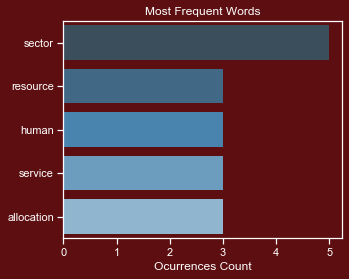

In [231]:
pip=Nlp_sample_pipeline(NEGATIVE_sample2)
print(pip.text_token())
print(pip.text_entities())
pip.frequentwords()

            text    text_lower         lemma   lemma_lower part_of_speech  \
0            the           the           the           the            DET   
1          youth         youth         youth         youth           NOUN   
2           will          will          will          will           VERB   
3             be            be            be            be           VERB   
4     sensitized    sensitized     sensitize     sensitize           VERB   
..           ...           ...           ...           ...            ...   
80           for           for           for           for            ADP   
81   agriculture   agriculture   agriculture   agriculture           NOUN   
82           and           and           and           and          CCONJ   
83  agribusiness  agribusiness  agribusiness  agribusiness           NOUN   
84             .             .             .             .          PUNCT   

    is_alphabet  is_stopword  
0          True         True  
1          Tr

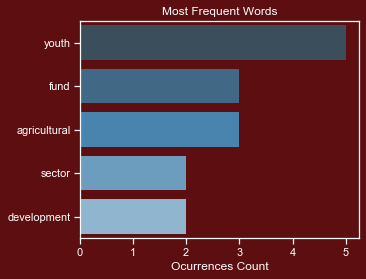

In [232]:
pip=Nlp_sample_pipeline(POSITIVE_sample2)
print(pip.text_token())
print(pip.text_entities())
pip.frequentwords()

In [133]:
def getTF(sentence):
    pip=Nlp_sample_pipeline(sentence)
    tokens=pip.text_token()
    tokens = tokens[(tokens["is_alphabet"] == True) & (tokens["is_stopword"] == False) 
                  & (tokens["lemma_lower"].str.len() > 1)]["lemma_lower"].value_counts()
    return tokens
    
getTF(POSITIVE_sample2)

youth           5
fund            3
agricultural    3
sector          2
development     2
establish       2
venture         1
produce         1
agribusiness    1
provide         1
plant           1
agriculture     1
ministry        1
addition        1
area            1
linkage         1
employment      1
allow           1
sport           1
processing      1
incentive       1
offer           1
constituency    1
farm            1
raw             1
lucrative       1
rural           1
opportunity     1
material        1
value           1
innovation      1
enterprise      1
sensitize       1
Name: lemma_lower, dtype: int64

In [148]:
from math import log

In [173]:
dataset=list(gold_standard['sentences'])

def cos_sim(a,b):
    dot_product=np.dot(a,b)
    norm_a=np.linalg.norm(a)
    norm_b=np.linalg.norm(b)
    return dot_product/(norm_a * norm_b)

def getTF(sentence):
    pip=Nlp_sample_pipeline(sentence)
    tokens=pip.text_token()
    tokens = tokens[(tokens["is_alphabet"] == True) & (tokens["is_stopword"] == False) 
                  & (tokens["lemma_lower"].str.len() > 1)]["lemma_lower"].value_counts()
    return tokens
    
def getIDF(term,dataset):
    totle=len(dataset)
    numDocumentsWithThisTerm = 0
    for item in dataset:
        if term.lower() in item.lower().split():
            numDocumentsWithThisTerm = numDocumentsWithThisTerm+1
    if numDocumentsWithThisTerm > 0:
        return 1.0 + log(float(len(dataset)) / numDocumentsWithThisTerm)
    else:
        return 1.0
    
def getSimilarity(sentence1,sentence2):
    tf1=getTF(sentence1)
    tf2=getTF(sentence2)
    all_words_list=[]
    for item in tf1.index:
        all_words_list.append(item)
    for item in tf2.index:
        if item not in all_words_list:
            all_words_list.append(item)
    all_words_list_size = len(all_words_list)
    
    v1=np.zeros(all_words_list_size, dtype=np.float)
    v2=np.zeros(all_words_list_size, dtype=np.float)
    i=0
    for item in all_words_list:
       # idf=getIDF(item,dataset)
        if item in tf1.index: 
            v1[i]=float(tf1[tf1.index==item])/float(len(tf1))
        else:
            v1[i]=0
        if item in tf2.index:
            v2[i]=float(tf2[tf2.index==item])/float(len(tf2))
        else:
            v2[i]=0
        i+=1
    return cos_sim(v1,v2)


In [175]:
getSimilarity(POSITIVE_sample1,POSITIVE_sample2)

0.16339347947960936

In [176]:
getSimilarity(POSITIVE_sample0,POSITIVE_sample2)

0.11653725268710467

In [177]:
getSimilarity(POSITIVE_sample1,POSITIVE_sample0)

0.1487044791289829

In [178]:
getSimilarity(NEGATIVE_sample1,NEGATIVE_sample2)

0.039021140551928436

In [181]:
getSimilarity(NEGATIVE_sample1,NEGATIVE_sample0)

0.19448274428220572

In [182]:
getSimilarity(NEGATIVE_sample0,POSITIVE_sample2)

0.05622898081638599

In [183]:
getSimilarity(NEGATIVE_sample0,POSITIVE_sample0)

0.032897584747988456

In [184]:
getSimilarity(NEGATIVE_sample0,POSITIVE_sample1)

0.05979133361118127

In [185]:
getSimilarity(NEGATIVE_sample0,POSITIVE_sample2)

0.05622898081638599

In [233]:
getSimilarity(NEGATIVE_sample1,POSITIVE_sample0)

0.12267493651573678

In [234]:
getSimilarity(NEGATIVE_sample2,POSITIVE_sample0)

0.012651134984231436

In [239]:
getSimilarity(NEGATIVE_sample2,NEGATIVE_sample0)

0.018312438553287787

In [134]:
# put all the sentences in an array(all the sentences are in their lower case)
dataset=list(gold_standard['sentences'])

In [153]:
getIDF("national",dataset)

2.7697384740814868

In [143]:
dataset

['the purpose of the middle level institutions is to provide a link between national and local level implementation of asds, technical support and coordination between ministries and stakeholders. in this connection, the following institutions will be strengthened  the inter ministerial coordination committee icc will be expanded to include all ministries that provide services to the agricultural sector. the icc will be composed of permanent secretaries of the collaborating ministries, and will be responsible for coordinating the planning of the strategy at the agricultural sector level and monitoring its implementation to ensure that its goals are achieved.',
 'to address these challenges, the government will implement the regional development policy, rationalize and restructure the authorities, and consolidate the regional development acts. emphasis will be on developing resource master plans and implementing integrated development programmes that create social and economic impact in

In [ ]:
#data processing before calculating similarity
#def preprocess(data):
#    data = convert_lower_case(data)
#    data = remove_punctuation(data)
#    data = remove_apostrophe(data)
#    data = remove_single_characters(data)
#    data = convert_numbers(data)
#    data = remove_stop_words(data)
#    data = stemming(data)
#    data = remove_punctuation(data)
#    data = convert_numbers(data)

In [ ]:
# TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

In [240]:
## word2vec
import gensim, operator
from scipy import spatial
import numpy as np
from gensim.models import KeyedVectors

model_path = 'D:/personal/columbia university/NLP/'

def load_wordvec_model(modelName, modelFile, flagBin):
    print('Loading ' + modelName + ' model...')
    model = KeyedVectors.load_word2vec_format(model_path + modelFile, binary=flagBin)
    print('Finished loading ' + modelName + ' model...')
    return model

model_word2vec = load_wordvec_model('Word2Vec', 'GoogleNews-vectors-negative300.bin.gz', True)

Loading Word2Vec model...
Finished loading Word2Vec model...


In [241]:
def vec_similarity(input1, input2, vectors):
    term_vectors = [np.zeros(300), np.zeros(300)]
    terms = [input1, input2]
        
    for index, term in enumerate(terms):
        for i, t in enumerate(term.split(' ')):
            try:
                term_vectors[index] += vectors[t]
            except:
                term_vectors[index] += 0
        
    result = (1 - spatial.distance.cosine(term_vectors[0], term_vectors[1]))
    if result is 'nan':
        result = 0
        
    return result

# function checks whether the input words are present in the vocabulary for the model
def vocab_check(vectors, words):
    
    output = list()
    for word in words:
        if word in vectors.vocab:
            output.append(word.strip())
            
    return output

# function calculates similarity between two strings using a particular word vector model
def calc_similarity(input1, input2, vectors):
    s1words = set(vocab_check(vectors, input1.split()))
    s2words = set(vocab_check(vectors, input2.split()))
    
    output = vectors.n_similarity(s1words, s2words)
    return output

In [242]:
calc_similarity(POSITIVE_sample0, POSITIVE_sample1, model_word2vec)

0.7614219

In [243]:
calc_similarity(POSITIVE_sample0, POSITIVE_sample2, model_word2vec)

0.71904147

In [245]:
calc_similarity(POSITIVE_sample1, POSITIVE_sample2, model_word2vec)

0.8236039

In [244]:
calc_similarity(NEGATIVE_sample0, NEGATIVE_sample2, model_word2vec)

0.83133304

In [246]:
calc_similarity(NEGATIVE_sample1, NEGATIVE_sample2, model_word2vec)

0.79403853

In [247]:
calc_similarity(NEGATIVE_sample1, NEGATIVE_sample0, model_word2vec)

0.8787872

In [248]:
calc_similarity(POSITIVE_sample0, NEGATIVE_sample0, model_word2vec)

0.74475825

In [249]:
calc_similarity(POSITIVE_sample0, NEGATIVE_sample1, model_word2vec)

0.7205844

In [250]:
calc_similarity(POSITIVE_sample0, NEGATIVE_sample2, model_word2vec)

0.7467183

In [256]:
calc_similarity(POSITIVE_sample2, NEGATIVE_sample0, model_word2vec)

0.791012

In [257]:
calc_similarity(POSITIVE_sample2, NEGATIVE_sample1, model_word2vec)

0.8154701

In [258]:
calc_similarity(POSITIVE_sample2, NEGATIVE_sample2, model_word2vec)

0.7449032

In [ ]:
if __name__ == '__main__':
    # example using Word2Vec
    str1 = POSITIVE_sample0
    str2 = 'New York'
    str3 = 'LA'
    str4 = 'Solopreneur'
    output1 = calc_similarity(str1, str3, model_word2vec)
    print(str1, str3, output1)
    output1 = calc_similarity(str1, str4, model_word2vec)
    print(str1, str4, output1)
    output1 = calc_similarity(str2, str4, model_word2vec)
    print(str2, str4, output1)
    output1 = calc_similarity(str2, str3, model_word2vec)
    print(str2, str3, output1)